In [35]:

import click
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import firwin, freqz
from scipy.special import erfc

from gnuradio import filter
from gnuradio.filter import firdes
from gnuradio.fft import window

# Parameters

In [37]:
fs       = 400e3
cutoff   = 150e3
datarate = 50e3

# FIR filter present on the FPGA

In [16]:

taps_fpga =  np.array([-0.001201261290430126, 0.0020488944185569607, -0.0020751053507837938, 4.910806933254215E-18, 0.004754535968663148, -0.00987450755161552, 0.00995675888032359, -1.4391882903962387E-17, -0.018922538981281996, 0.036214375130954504, -0.03468641976116993, 2.4803862788187382E-17, 0.06848299151299582, -0.15293237705130486, 0.22297239138994396, 0.7505245253702963, 0.22297239138994396, -0.15293237705130486, 0.06848299151299582, 2.4803862788187385E-17, -0.034686419761169936, 0.036214375130954504, -0.018922538981282003, -1.4391882903962393E-17, 0.00995675888032359, -0.009874507551615532, 0.004754535968663151, 4.910806933254215E-18, -0.0020751053507837946, 0.0020488944185569607, -0.001201261290430126])  # Example coefficients


# Emulation of the FPGA filter through GNU Radio

In [55]:
taps_gnu = firdes.low_pass(
                1,
                fs,
                150e3,
                32e3,
                window.WIN_HAMMING,
                6.76)

[-0.0012012611841782928, 0.0020488945301622152, -0.002075105207040906, 4.910806687785427e-18, 0.0047545358538627625, -0.009874507784843445, 0.009956758469343185, -1.4391880558516163e-17, -0.018922537565231323, 0.036214374005794525, -0.03468641638755798, 2.4803862663433464e-17, 0.06848298758268356, -0.15293236076831818, 0.22297239303588867, 0.7505245208740234, 0.22297239303588867, -0.15293236076831818, 0.06848298758268356, 2.4803862663433464e-17, -0.03468641638755798, 0.036214374005794525, -0.018922537565231323, -1.4391880558516163e-17, 0.009956758469343185, -0.009874507784843445, 0.0047545358538627625, 4.910806687785427e-18, -0.002075105207040906, 0.0020488945301622152, -0.0012012611841782928]


# Same with firwin function from Python

In [56]:

taps_firwin = firwin(len(taps_fpga),cutoff, fs=fs,window="hamming",width = 50e3)

# Plot of the transfer functions

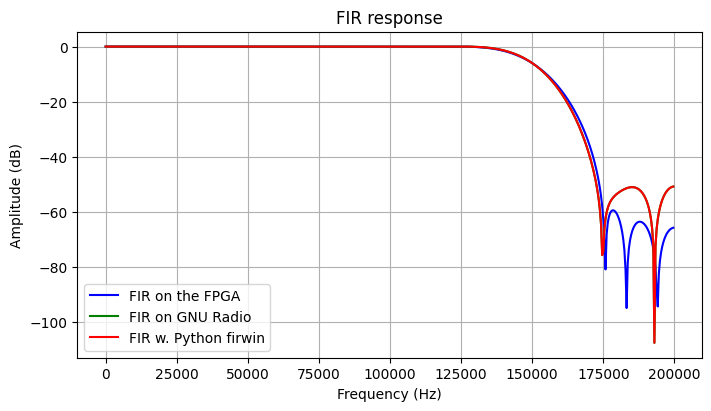

In [63]:
# Filter transfer function
w_fpga, h_fpga = freqz(taps_firwin)
w_fir , h_fir  = freqz(taps_fpga)
w_gnu , h_gnu  = freqz(taps_gnu)
f = w_fir * fs * 0.5 / np.pi
_fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(7, 4))
ax.set_title("FIR response")
ax.plot(f, 20 * np.log10(abs(h_fpga)), "b", label = "FIR on the FPGA")
ax.plot(f, 20 * np.log10(abs(h_gnu)) , "g", label = "FIR on GNU Radio")
ax.plot(f, 20 * np.log10(abs(h_fir)) , "r", label = "FIR w. Python firwin")
ax.set_ylabel("Amplitude (dB)")
ax.set_xlabel("Frequency (Hz)")
ax.legend()
ax.grid()
